In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('LifeExpectancyClean.csv', index_col=0)

In [3]:
cols = ['Adult Mortality',
       'Alcohol', 'Percentage Expenditure',
       'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS','Population', 'Thinness 1-19 Years',
       'Income Composition of Resources', 'Schooling',
       'PopulationDensity', 'Population Growth Rate',
       'HealthyWeightBMI', 'ObesityBMI',
       'HighIncome', 'LowIncome',
       'Human Rights', 'Armed Personnel',
       'Suicide Rate', 'Agriculture Employment']

cols_ext = ['Life Expectancy', 'Adult Mortality',
       'Alcohol', 'Percentage Expenditure',
       'Polio', 'Total Expenditure',
       'Diphtheria', 'HIV/AIDS', 'Population', 'Thinness 1-19 Years',
       'Income Composition of Resources', 'Schooling',
       'PopulationDensity', 'Population Growth Rate',
       'HealthyWeightBMI', 'ObesityBMI',
       'HighIncome', 'LowIncome',
       'Human Rights', 'Armed Personnel',
       'Suicide Rate', 'Agriculture Employment']

## Feature Selection

### Mutual Information: 
Mutual Information measures the dependency between two variables. Higher mutual information means a stronger relationship.

Adult Mortality                    1.192821
Income Composition of Resources    0.872993
Thinness 1-19 Years                0.786188
Schooling                          0.653841
Human Rights                       0.526233
HIV/AIDS                           0.524645
Agriculture Employment             0.494938
Population Growth Rate             0.426475
Armed Personnel                    0.362422
Suicide Rate                       0.330430
Alcohol                            0.328059
Polio                              0.313258
Population                         0.297365
Percentage Expenditure             0.294335
Diphtheria                         0.282543
HealthyWeightBMI                   0.272968
Total Expenditure                  0.264866
PopulationDensity                  0.227640
LowIncome                          0.165924
HighIncome                         0.163724
ObesityBMI                         0.015429
dtype: float64


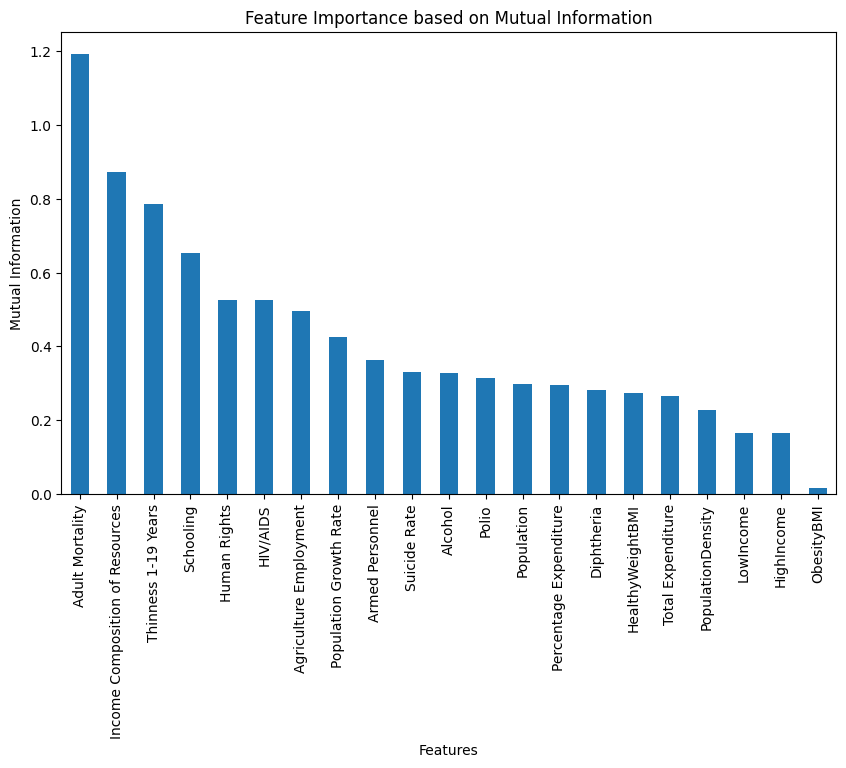

In [4]:
# Independent variables (X) and dependent variable (y)
X = df[cols]  # Independent variables
y = df['Life Expectancy']  # Dependent variable

# Calculate mutual information between each feature and the target
mi = mutual_info_regression(X, y)

# Display the feature importance, sorted in descending order
feature_importance = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance based on Mutual Information')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()


## Multiple Linear Regression Model

In [5]:
# Preprocess the data
X = df[cols]  # Independent variables
y = df['Life Expectancy']  # Dependent variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {np.sqrt(mse)}')
print(f'R^2: {r2}')

# Interpret the coefficients
coefficients = model.coef_
intercept = model.intercept_
print("Intercept:", intercept)
print("Coefficients:", coefficients)

MAE: 2.689529719336246
MSE: 14.17888792530777
RMSE: 3.765486412843335
R^2: 0.8373742301188164
Intercept: 59.55529604368289
Coefficients: [-1.47485092e-02  2.91532129e-02  2.42927783e-04  1.86240074e-02
  3.11195496e-03  3.47212426e-02 -5.86775615e-01  3.36468308e-09
 -3.00919516e-02  5.82989073e+00  4.94362979e-01  8.33900629e-04
 -4.26674537e+01 -3.08881534e+00  7.21169841e-01  1.34901347e+00
 -1.37984215e+00  2.26353249e+00  7.52197258e-01 -1.41877054e-01
  1.00962765e-05]


### Test Multicollinearity Using VIF

In [6]:
X_with_const = sm.add_constant(df[cols])

# Calculate VIF for each independent variable
vif_data = pd.DataFrame()
vif_data['Variable'] = X_with_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_const.values, i) for i in range(X_with_const.shape[1])]

print(vif_data)


                           Variable        VIF
0                             const  83.288349
1                   Adult Mortality   1.506560
2                           Alcohol   1.994897
3            Percentage Expenditure   1.923371
4                             Polio   1.936151
5                 Total Expenditure   1.244430
6                        Diphtheria   1.946911
7                          HIV/AIDS   1.177548
8                        Population   1.163386
9               Thinness 1-19 Years   1.880783
10  Income Composition of Resources   3.004867
11                        Schooling   3.853835
12                PopulationDensity   1.214944
13           Population Growth Rate   1.451218
14                 HealthyWeightBMI   2.423653
15                       ObesityBMI   1.071231
16                       HighIncome   2.058906
17                        LowIncome   1.542343
18                     Human Rights   1.759995
19                  Armed Personnel   1.265313
20           

### Diagnostic Plots

## Feature Importance

### Random Forest


Feature Importance:
                            Feature  Importance
6                          HIV/AIDS    0.617956
9   Income Composition of Resources    0.181778
0                   Adult Mortality    0.085271
13                 HealthyWeightBMI    0.013774
10                        Schooling    0.011746
19                     Suicide Rate    0.010024
8               Thinness 1-19 Years    0.009315
1                           Alcohol    0.008753
11                PopulationDensity    0.008538
12           Population Growth Rate    0.007201
7                        Population    0.006919
18                  Armed Personnel    0.005856
17                     Human Rights    0.005490
4                 Total Expenditure    0.005375
20           Agriculture Employment    0.004965
5                        Diphtheria    0.004834
3                             Polio    0.004544
2            Percentage Expenditure    0.003447
15                       HighIncome    0.003342
16                 

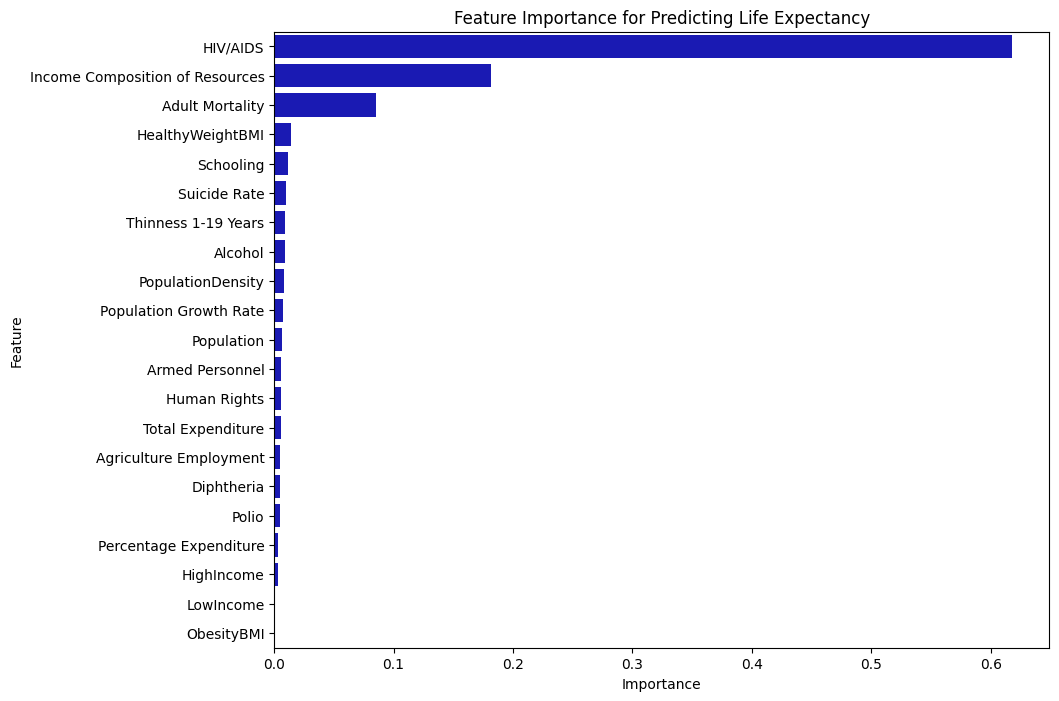

In [7]:
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test data
y_pred = rf.predict(X_test)

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Visualize Feature Importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', color='mediumblue', data=feature_importance)
plt.title('Feature Importance for Predicting Life Expectancy')
plt.show()


### Permutation

Model R^2 Score: 0.8374


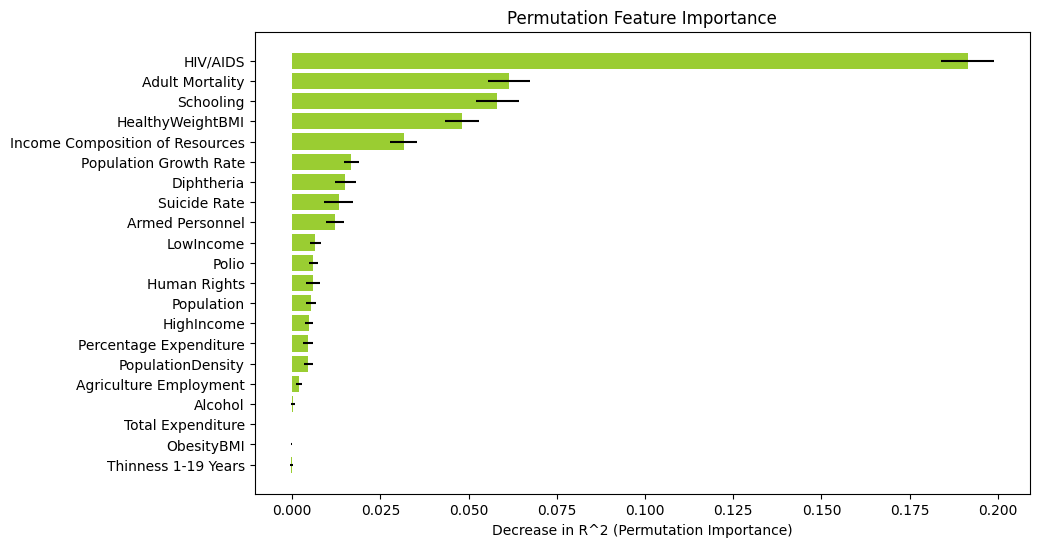

In [8]:
# Evaluate the model on the test set
score = model.score(X_test, y_test)
print(f"Model R^2 Score: {score:.4f}")

# Calculate permutation feature importance
perm_importance = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42
)

# Extract importance and standard deviations
sorted_idx = perm_importance.importances_mean.argsort()
importance_mean = perm_importance.importances_mean[sorted_idx]
importance_std = perm_importance.importances_std[sorted_idx]
feature_names = np.array(X_test.columns)[sorted_idx]

# Plot permutation feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance_mean, xerr=importance_std, color='yellowgreen', align='center')
plt.xlabel("Decrease in R^2 (Permutation Importance)")
plt.title("Permutation Feature Importance")
plt.show()


## Correlation Analysis

### PCA

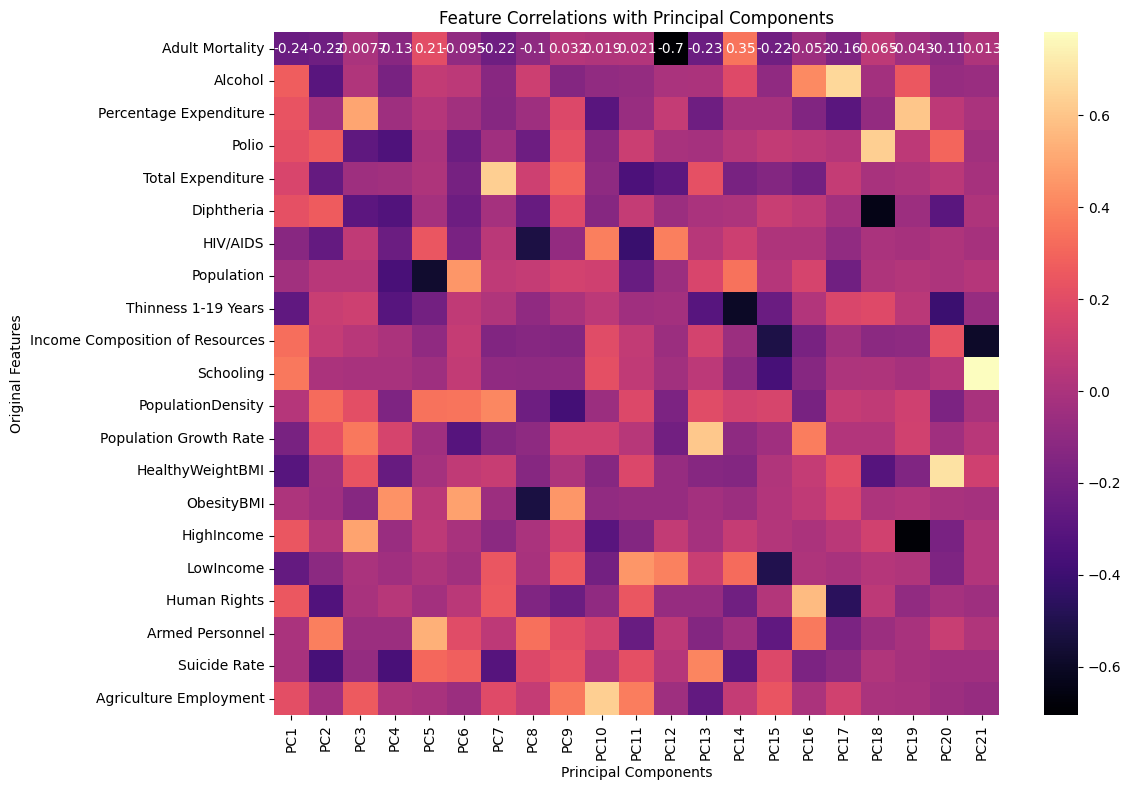

PC1 explains 27.03% of the variance.
PC2 explains 8.84% of the variance.
PC3 explains 7.16% of the variance.
PC4 explains 6.30% of the variance.
PC5 explains 5.70% of the variance.
PC6 explains 5.16% of the variance.
PC7 explains 4.44% of the variance.
PC8 explains 4.27% of the variance.
PC9 explains 3.90% of the variance.
PC10 explains 3.63% of the variance.
PC11 explains 3.60% of the variance.
PC12 explains 2.96% of the variance.
PC13 explains 2.72% of the variance.
PC14 explains 2.47% of the variance.
PC15 explains 2.40% of the variance.
PC16 explains 2.14% of the variance.
PC17 explains 1.86% of the variance.
PC18 explains 1.58% of the variance.
PC19 explains 1.52% of the variance.
PC20 explains 1.45% of the variance.
PC21 explains 0.86% of the variance.


In [9]:
# Assuming you have a DataFrame `df` with features `cols`
X = df[cols]

# Standardize the data (important for PCA to ensure all features have equal weight)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Get the loadings (correlation of features with PCs)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(X_pca.shape[1])],
    index=cols
)

# Calculate the explained variance ratio for each PC
explained_variance = pca.explained_variance_ratio_

# Plot the correlation matrix (heatmap) of features with principal components
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap="magma", cbar=True)
plt.title("Feature Correlations with Principal Components")
plt.xlabel("Principal Components")
plt.ylabel("Original Features")
plt.tight_layout()
plt.show()

# Print explained variance ratios
for i, var in enumerate(explained_variance, 1):
    print(f"PC{i} explains {var:.2%} of the variance.")
